In [ ]:
from tqdm.notebook import tqdm_notebook
import tensorflow as tf
import zipfile
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import shutil

In [ ]:
tf.random.set_seed(1)
random.seed(1)
np.random.seed(1)

In [ ]:
!wget "https://storage.googleapis.com/cae_covid_classification/covid_normal_pneumonia.zip"

--2021-07-30 03:54:55--  https://storage.googleapis.com/cae_covid_classification/covid_normal_pneumonia.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815753304 (778M) [application/x-zip-compressed]
Saving to: ‘covid_normal_pneumonia.zip’

covid_normal_pneumo 100%[===================>] 777.96M   109MB/s    in 6.8s    

2021-07-30 03:55:02 (114 MB/s) - ‘covid_normal_pneumonia.zip’ saved [815753304/815753304]



In [ ]:
!unzip -q covid_normal_pneumonia.zip

In [ ]:
total_covid = len(os.listdir('covid_normal_pneumonia/COVID/'))
total_normal = len(os.listdir('covid_normal_pneumonia/NORMAL/'))
total_pneumonia = len(os.listdir('covid_normal_pneumonia/PNEUMONIA/'))
print('covid_count : {} | normal_count : {} | pneumonia_count : {}'.format( str(total_covid),str(total_normal),str(total_pneumonia)) )

covid_count : 3709 | normal_count : 3700 | pneumonia_count : 3700


In [ ]:
try:
    os.system("rm -rf ./split_data")
    os.mkdir('split_data')
    os.mkdir('split_data/train')
    os.mkdir('split_data/valid_test')
    os.mkdir('split_data/valid')
    os.mkdir('split_data/test')

    os.mkdir('split_data/train/COVID')
    os.mkdir('split_data/train/NORMAL')
    os.mkdir('split_data/train/PNEUMONIA')

    os.mkdir('split_data/valid_test/COVID')
    os.mkdir('split_data/valid_test/NORMAL')
    os.mkdir('split_data/valid_test/PNEUMONIA')

    os.mkdir('split_data/valid/COVID')
    os.mkdir('split_data/valid/NORMAL')
    os.mkdir('split_data/valid/PNEUMONIA')

    os.mkdir('split_data/test/COVID')
    os.mkdir('split_data/test/NORMAL')
    os.mkdir('split_data/test/PNEUMONIA')
    print('created directories')
except OSError as e:
    print('OS error occurred', e)

created directories


In [ ]:
def split_data(source, training, testing, split_ratio):
  threshold = len(os.listdir(source)) * split_ratio
  flag = 0
  for i in random.sample(os.listdir(source), len(os.listdir(source))):
    flag += 1
    if flag <= threshold:
      if os.path.getsize(source + i) > 0:
        shutil.copyfile(source + i, training + i)
      else:
        print(source + i + " is zero length, so ignoring")
    else:
      if os.path.getsize(source + i) > 0:
        shutil.copyfile(source + i, testing + i)
      else:
        print(source + i + " is zero length, so ignoring")

In [ ]:
COVID_SOURCE_DIR = 'covid_normal_pneumonia/COVID/'
NORMAL_SOURCE_DIR = 'covid_normal_pneumonia/NORMAL/'
PNEUMONIA_SOURCE_DIR = 'covid_normal_pneumonia/PNEUMONIA/'

TRAINING_COVID_DIR = 'split_data/train/COVID/'
VALID_TEST_COVID_DIR = 'split_data/valid_test/COVID/'
VALIDATING_COVID_DIR = 'split_data/valid/COVID/'
TESTING_COVID_DIR = 'split_data/test/COVID/'

TRAINING_NORMAL_DIR = 'split_data/train/NORMAL/'
VALID_TEST_NORMAL_DIR = 'split_data/valid_test/NORMAL/'
VALIDATING_NORMAL_DIR = 'split_data/valid/NORMAL/'
TESTING_NORMAL_DIR = 'split_data/test/NORMAL/'

TRAINING_PNEUMONIA_DIR = 'split_data/train/PNEUMONIA/'
VALID_TEST_PNEUMONIA_DIR = 'split_data/valid_test/PNEUMONIA/'
VALIDATING_PNEUMONIA_DIR = 'split_data/valid/PNEUMONIA/'
TESTING_PNEUMONIA_DIR = 'split_data/test/PNEUMONIA/'

In [ ]:
split_data(COVID_SOURCE_DIR, TRAINING_COVID_DIR, VALID_TEST_COVID_DIR, 0.729)
split_data(VALID_TEST_COVID_DIR, VALIDATING_COVID_DIR, TESTING_COVID_DIR, 0.5)

In [ ]:
tr_c = len(os.listdir(TRAINING_COVID_DIR))
vl_c = len(os.listdir(VALIDATING_COVID_DIR))
tst_c = len(os.listdir(TESTING_COVID_DIR))
print('covid_train count : {} | covid_valid count : {} | covid_test count : {}'.format( str(tr_c),str(vl_c),str(tst_c)) )

covid_train count : 2703 | covid_valid count : 503 | covid_test count : 503


In [ ]:
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, VALID_TEST_NORMAL_DIR, 0.729)
split_data(VALID_TEST_NORMAL_DIR, VALIDATING_NORMAL_DIR, TESTING_NORMAL_DIR, 0.5)

In [ ]:
tr_n = len(os.listdir(TRAINING_NORMAL_DIR))
vl_n = len(os.listdir(VALIDATING_NORMAL_DIR))
tst_n = len(os.listdir(TESTING_NORMAL_DIR))
print('normal_train count : {} | normal_valid count : {} | normal_test count : {}'.format( str(tr_n),str(vl_n),str(tst_n)) )

normal_train count : 2697 | normal_valid count : 501 | normal_test count : 502


In [ ]:
split_data(PNEUMONIA_SOURCE_DIR, TRAINING_PNEUMONIA_DIR, VALID_TEST_PNEUMONIA_DIR, 0.729)
split_data(VALID_TEST_PNEUMONIA_DIR, VALIDATING_PNEUMONIA_DIR, TESTING_PNEUMONIA_DIR, 0.5)

In [ ]:
tr_p = len(os.listdir(TRAINING_PNEUMONIA_DIR))
vl_p = len(os.listdir(VALIDATING_PNEUMONIA_DIR))
tst_p = len(os.listdir(TESTING_PNEUMONIA_DIR))
print('pneumonia_train count : {} | pneumonia_valid count : {} | pneumonia_test count : {}'.format( str(tr_p),str(vl_p),str(tst_p)) )

pneumonia_train count : 2697 | pneumonia_valid count : 501 | pneumonia_test count : 502


In [ ]:
TRAINING_DIR = 'split_data/train/'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255.0)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    target_size=(224, 224),
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    batch_size=16)

VALIDATING_DIR = 'split_data/valid/'
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255.0)
valid_generator = valid_datagen.flow_from_directory(VALIDATING_DIR,
                                                    target_size=(224, 224),
                                                    class_mode='categorical',
                                                    shuffle=False,
                                                    batch_size=16)

Found 8097 images belonging to 3 classes.
Found 1505 images belonging to 3 classes.


In [ ]:
cae_model = tf.keras.models.load_model('pretrain_cae/cae.h5')

In [ ]:
for layer in cae_model.layers[0].layers:
  layer.trainable = False

In [ ]:
for batch, label in train_generator:
  print(batch.shape)
   # values should be in `[0,1]`.
  print(np.min(batch[0]), np.max(batch[0]))
  break


(16, 224, 224, 3)
0.0 0.8705883


In [ ]:
enc_out = cae_model.layers[0].output

In [ ]:
y = tf.keras.layers.Reshape((49,512))(enc_out)
y = tf.keras.layers.LSTM(512, return_sequences=True)(y)
y = tf.keras.layers.LSTM(256, return_sequences=True)(y)
y = tf.keras.layers.LSTM(128, return_sequences=True)(y)
y = tf.keras.layers.Flatten()(y)
y = tf.keras.layers.Dense(64, activation='relu')(y)
y = tf.keras.layers.Dense(3, activation='softmax')(y)

In [ ]:
classification = tf.keras.Model(cae_model.layers[0].input, y)

In [ ]:
classification.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 256)       295168

In [ ]:
classification.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto')

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('covid_classification.h5', save_best_only=True)

In [ ]:
epochs = 20

In [ ]:
history = classification.fit(train_generator,
                             epochs=epochs,
                             validation_data=valid_generator,
                             callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/20
507/507 [==============================] - 87s 101ms/step - loss: 0.5316 - accuracy: 0.7598 - val_loss: 0.3298 - val_accuracy: 0.8638
Epoch 2/20
507/507 [==============================] - 51s 101ms/step - loss: 0.3077 - accuracy: 0.8751 - val_loss: 0.2192 - val_accuracy: 0.9183
Epoch 3/20
507/507 [==============================] - 50s 98ms/step - loss: 0.2251 - accuracy: 0.9122 - val_loss: 0.2684 - val_accuracy: 0.9017
Epoch 4/20
507/507 [==============================] - 50s 99ms/step - loss: 0.1953 - accuracy: 0.9249 - val_loss: 0.2186 - val_accuracy: 0.9203
Epoch 5/20
507/507 [==============================] - 49s 96ms/step - loss: 0.1599 - accuracy: 0.9395 - val_loss: 0.1713 - val_accuracy: 0.9329
Epoch 6/20
507/507 [==============================] - 49s 97ms/step - loss: 0.1264 - accuracy: 0.9534 - val_loss: 0.1388 - val_accuracy: 0.9482
Epoch 7/20
507/507 [==============================] - 51s 101ms/step - loss: 0.1111 - accuracy: 0.9605 - val_loss: 0.1357 - val_accura

In [ ]:
history.history

{'accuracy': [0.7597875595092773,
  0.8751389384269714,
  0.9121897220611572,
  0.9249104857444763,
  0.9394837617874146,
  0.9534395337104797,
  0.960479199886322,
  0.9654192924499512,
  0.9673953056335449,
  0.9715943932533264,
  0.9788810610771179,
  0.9781400561332703,
  0.9822156429290771,
  0.9845621585845947,
  0.9865382313728333,
  0.9877732396125793],
 'loss': [0.5315805673599243,
  0.3077203929424286,
  0.22513854503631592,
  0.1952570378780365,
  0.1598777025938034,
  0.12642733752727509,
  0.11109338700771332,
  0.09738572686910629,
  0.08448626846075058,
  0.07802886515855789,
  0.06006240099668503,
  0.06102360039949417,
  0.04641888663172722,
  0.04361028969287872,
  0.0405416302382946,
  0.034559570252895355],
 'val_accuracy': [0.8637873530387878,
  0.9182724356651306,
  0.9016611576080322,
  0.920265793800354,
  0.9328903555870056,
  0.9481727480888367,
  0.9528239369392395,
  0.934883713722229,
  0.9362125992774963,
  0.9508305788040161,
  0.9561461806297302,
  0.952

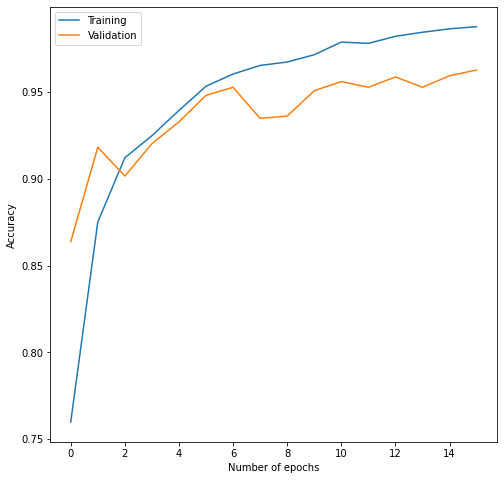

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='best')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.savefig('accuracy.png', dpi=300)
plt.show()

# plt.subplot(1, 2, 2)

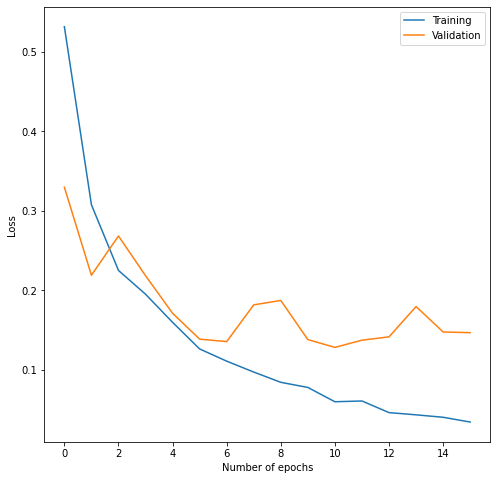

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='best')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.savefig('loss.png', dpi=300)
plt.show()

In [ ]:
classification = tf.keras.models.load_model('covid_classification.h5')  ## load best model

In [ ]:
for ix, ly in enumerate(classification.layers):
  print(ix, ly, ly.trainable)

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fb497f34ad0> True
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb497fe6a90> False
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb497f68050> False
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb497f68950> False
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb497f68ed0> False
5 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb497f6c390> False
6 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb497f34bd0> False
7 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb497f6cd50> False
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb497f6d310> False
9 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb497f34150> False
10 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb4ebe64450> False
11 <tensorflow.python.keras.layers.poolin

In [ ]:
classification.layers[10].trainable = True
classification.layers[11].trainable = True

In [ ]:
history_unfreeze_l2 = classification.fit(train_generator,
                              epochs=epochs,
                              validation_data=valid_generator,
                              callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/20
507/507 [==============================] - 53s 100ms/step - loss: 0.0609 - accuracy: 0.9774 - val_loss: 0.1476 - val_accuracy: 0.9568
Epoch 2/20
507/507 [==============================] - 50s 99ms/step - loss: 0.0409 - accuracy: 0.9857 - val_loss: 0.1878 - val_accuracy: 0.9508
Epoch 3/20
507/507 [==============================] - 49s 97ms/step - loss: 0.0464 - accuracy: 0.9832 - val_loss: 0.1573 - val_accuracy: 0.9668
Epoch 4/20
507/507 [==============================] - 51s 100ms/step - loss: 0.0391 - accuracy: 0.9849 - val_loss: 0.1698 - val_accuracy: 0.9641
Epoch 5/20
507/507 [==============================] - 50s 99ms/step - loss: 0.0339 - accuracy: 0.9874 - val_loss: 0.1549 - val_accuracy: 0.9555
Epoch 6/20
507/507 [==============================] - 50s 98ms/step - loss: 0.0320 - accuracy: 0.9880 - val_loss: 0.1628 - val_accuracy: 0.9575


In [ ]:
history_unfreeze_l2.history

{'accuracy': [0.9773990511894226,
  0.985673725605011,
  0.983203649520874,
  0.9849327206611633,
  0.9874027371406555,
  0.9880202412605286],
 'loss': [0.06087088957428932,
  0.040920842438936234,
  0.04642781242728233,
  0.03912176564335823,
  0.033863525837659836,
  0.03202168270945549],
 'val_accuracy': [0.9568106532096863,
  0.9508305788040161,
  0.9667773842811584,
  0.9641196131706238,
  0.9554817080497742,
  0.9574750661849976],
 'val_loss': [0.14759914577007294,
  0.1878010779619217,
  0.1572505235671997,
  0.16975408792495728,
  0.15485325455665588,
  0.16284485161304474]}

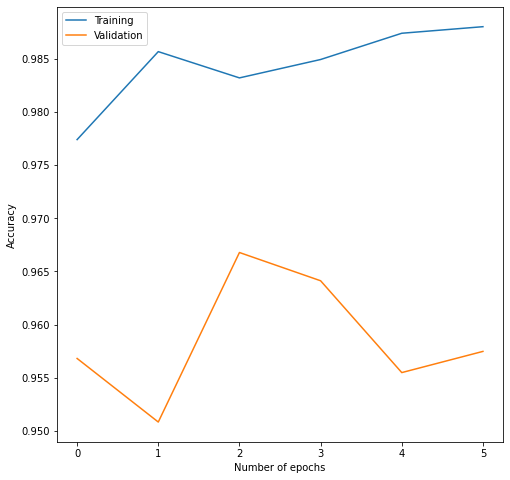

In [ ]:
acc = history_unfreeze_l2.history['accuracy']
val_acc = history_unfreeze_l2.history['val_accuracy']

loss = history_unfreeze_l2.history['loss']
val_loss = history_unfreeze_l2.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='best')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.savefig('accuracy_unfreeze_l2.png', dpi=300)
plt.show()

# plt.subplot(1, 2, 2)

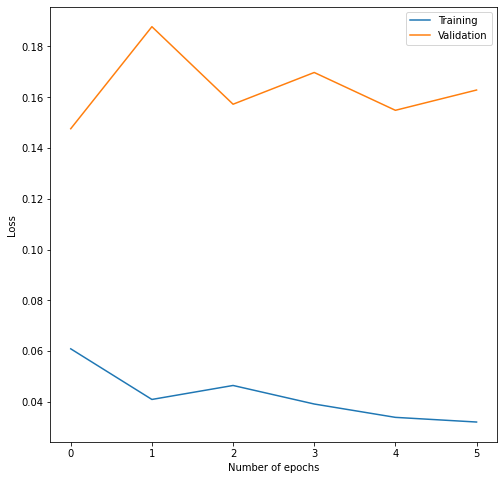

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='best')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.savefig('loss_unfreeze_l2.png', dpi=300)
plt.show()

In [ ]:
classification = tf.keras.models.load_model('covid_classification.h5')  ## load best model

In [ ]:
classification.layers[6].trainable = True
classification.layers[7].trainable = True
classification.layers[8].trainable = True
classification.layers[9].trainable = True

In [ ]:
classification.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_unfreeze_l6 = classification.fit(train_generator,
                              epochs=epochs,
                              validation_data=valid_generator,
                              callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/20
507/507 [==============================] - 59s 104ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.1321 - val_accuracy: 0.9575
Epoch 2/20
507/507 [==============================] - 52s 103ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.1581 - val_accuracy: 0.9628
Epoch 3/20
507/507 [==============================] - 54s 106ms/step - loss: 0.0081 - accuracy: 0.9968 - val_loss: 0.1676 - val_accuracy: 0.9555
Epoch 4/20
507/507 [==============================] - 51s 101ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.1689 - val_accuracy: 0.9628
Epoch 5/20
507/507 [==============================] - 51s 101ms/step - loss: 9.6445e-04 - accuracy: 1.0000 - val_loss: 0.1876 - val_accuracy: 0.9601
Epoch 6/20
507/507 [==============================] - 51s 100ms/step - loss: 2.8631e-04 - accuracy: 1.0000 - val_loss: 0.1921 - val_accuracy: 0.9615


In [ ]:
history_unfreeze_l6.history

{'accuracy': [0.9913548231124878,
  0.9955539107322693,
  0.9967889189720154,
  0.9992589950561523,
  1.0,
  1.0],
 'loss': [0.02636817656457424,
  0.01354555319994688,
  0.008148415014147758,
  0.0033066519536077976,
  0.000964451115578413,
  0.0002863139088731259],
 'val_accuracy': [0.9574750661849976,
  0.9627906680107117,
  0.9554817080497742,
  0.9627906680107117,
  0.960132896900177,
  0.9614617824554443],
 'val_loss': [0.13210856914520264,
  0.15812285244464874,
  0.16764503717422485,
  0.16894441843032837,
  0.18756666779518127,
  0.1920904666185379]}

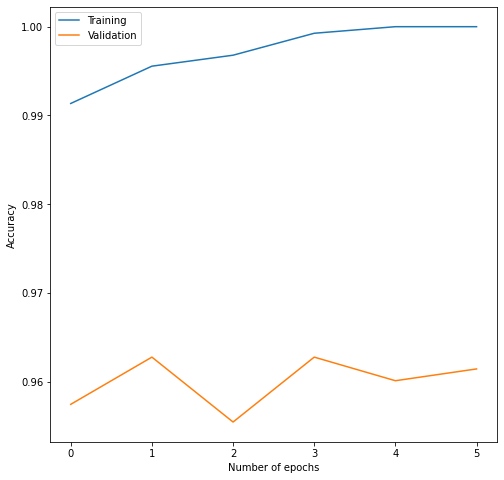

In [ ]:
acc = history_unfreeze_l6.history['accuracy']
val_acc = history_unfreeze_l6.history['val_accuracy']

loss = history_unfreeze_l6.history['loss']
val_loss = history_unfreeze_l6.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='best')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.savefig('accuracy_unfreeze_l6.png', dpi=300)
plt.show()

# plt.subplot(1, 2, 2)

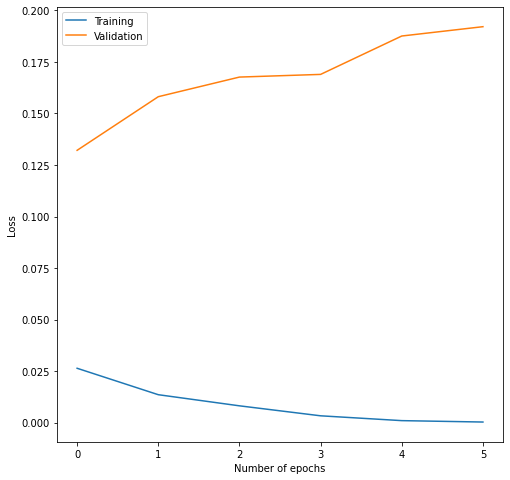

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='best')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.savefig('loss_unfreeze_l6.png', dpi=300)
plt.show()

In [ ]:
classification = tf.keras.models.load_model('covid_classification.h5')  ## load best model

In [ ]:
for i in classification.layers:
  i.trainable=True

In [ ]:
classification.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_unfreeze_all = classification.fit(train_generator,
                              epochs=epochs,
                              validation_data=valid_generator,
                              callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/20
507/507 [==============================] - 75s 138ms/step - loss: 0.0248 - accuracy: 0.9932 - val_loss: 0.1398 - val_accuracy: 0.9548
Epoch 2/20
507/507 [==============================] - 68s 134ms/step - loss: 0.0137 - accuracy: 0.9963 - val_loss: 0.1378 - val_accuracy: 0.9615
Epoch 3/20
507/507 [==============================] - 68s 133ms/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 0.1484 - val_accuracy: 0.9601
Epoch 4/20
507/507 [==============================] - 67s 133ms/step - loss: 0.0046 - accuracy: 0.9995 - val_loss: 0.1432 - val_accuracy: 0.9628
Epoch 5/20
507/507 [==============================] - 68s 133ms/step - loss: 0.0028 - accuracy: 0.9999 - val_loss: 0.1472 - val_accuracy: 0.9661
Epoch 6/20
507/507 [==============================] - 67s 132ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1498 - val_accuracy: 0.9648
Epoch 7/20
507/507 [==============================] - 69s 135ms/step - loss: 9.6284e-04 - accuracy: 1.0000 - val_loss: 0.1595 - va

In [ ]:
history_unfreeze_all.history

{'accuracy': [0.9932073354721069,
  0.9962949156761169,
  0.9980239868164062,
  0.9995059967041016,
  0.9998764991760254,
  1.0,
  1.0],
 'loss': [0.02481984533369541,
  0.013728447258472443,
  0.00851959828287363,
  0.004649192560464144,
  0.0028221909888088703,
  0.001510972622781992,
  0.000962842081207782],
 'val_accuracy': [0.9548172950744629,
  0.9614617824554443,
  0.960132896900177,
  0.9627906680107117,
  0.9661129713058472,
  0.9647840261459351,
  0.9627906680107117],
 'val_loss': [0.13979457318782806,
  0.13776402175426483,
  0.14835436642169952,
  0.14319224655628204,
  0.14720386266708374,
  0.14975373446941376,
  0.1595383733510971]}

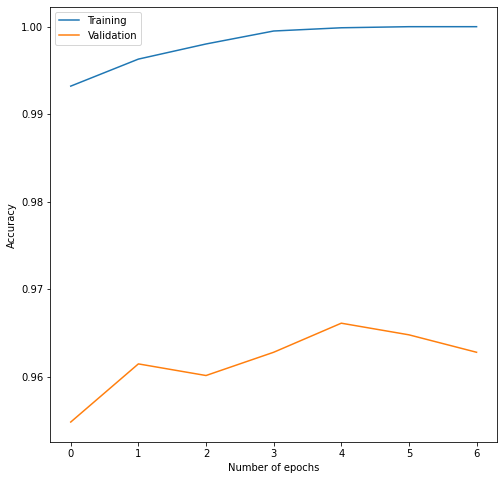

In [ ]:
acc = history_unfreeze_all.history['accuracy']
val_acc = history_unfreeze_all.history['val_accuracy']

loss = history_unfreeze_all.history['loss']
val_loss = history_unfreeze_all.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='best')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.savefig('accuracy_unfreeze_all.png', dpi=300)
plt.show()

# plt.subplot(1, 2, 2)

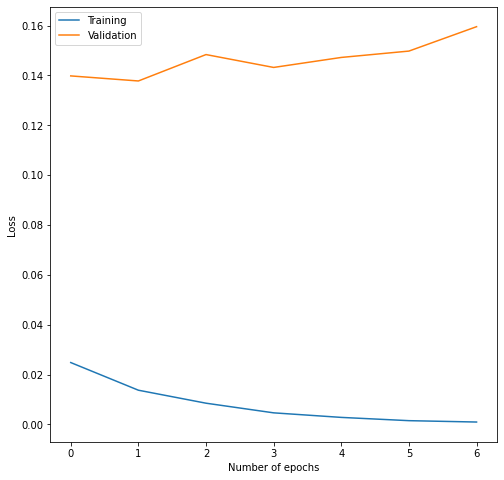

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='best')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.savefig('loss_unfreeze_all.png', dpi=300)
plt.show()

In [ ]:
classification = tf.keras.models.load_model('covid_classification.h5')  ## load best model

In [ ]:
train_loss = history.history['loss']+history_unfreeze_l2.history['loss']+history_unfreeze_l6.history['loss']+history_unfreeze_all.history['loss']

In [ ]:
train_acc = history.history['accuracy']+history_unfreeze_l2.history['accuracy']+history_unfreeze_l6.history['accuracy']+history_unfreeze_all.history['accuracy']

In [ ]:
val_loss = history.history['val_loss']+history_unfreeze_l2.history['val_loss']+history_unfreeze_l6.history['val_loss']+history_unfreeze_all.history['val_loss']

In [ ]:
val_acc = history.history['val_accuracy']+history_unfreeze_l2.history['val_accuracy']+history_unfreeze_l6.history['val_accuracy']+history_unfreeze_all.history['val_accuracy']

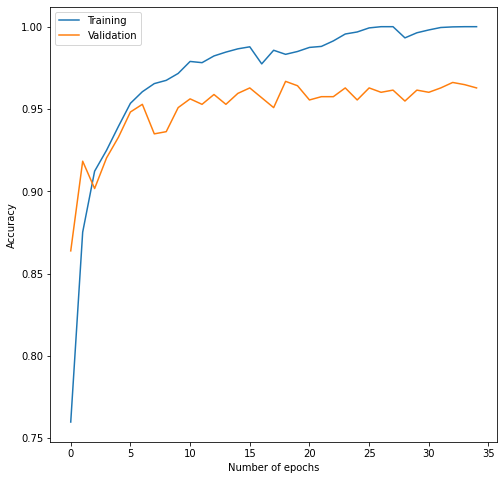

In [ ]:
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='best')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.savefig('accuracy_overall.png', dpi=300)
plt.show()

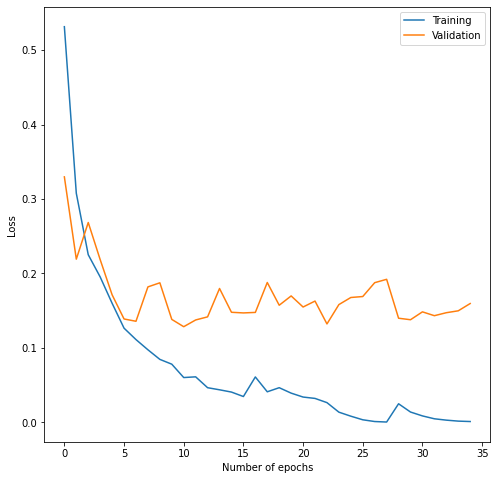

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='best')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.savefig('loss_overall.png', dpi=300)
plt.show()

# TESTING 

In [ ]:
TESING_DIR = 'split_data/test/'
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255.0)
test_generator = test_datagen.flow_from_directory(TESING_DIR,
                                                    target_size=(224, 224),
                                                    class_mode='categorical',
                                                    shuffle=False,
                                                    batch_size=32)

Found 1507 images belonging to 3 classes.


In [ ]:
predictions = classification.predict(test_generator)

In [ ]:
predictions.shape

(1507, 3)

In [ ]:
predicted_classes = np.argmax(predictions, axis=-1)
min(predicted_classes),max(predicted_classes)  ## must be 0,2

(0, 2)

In [ ]:
test_generator.class_indices

{'COVID': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [ ]:
test_generator.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
labels = test_generator.classes

In [ ]:
class_names = list(test_generator.class_indices.keys())
class_names

['COVID', 'NORMAL', 'PNEUMONIA']

In [ ]:
classification_report = metrics.classification_report(labels, predicted_classes, target_names=class_names)
print(classification_report)

              precision    recall  f1-score   support

       COVID       0.97      0.93      0.95       503
      NORMAL       0.94      0.97      0.95       502
   PNEUMONIA       0.98      0.99      0.99       502

    accuracy                           0.96      1507
   macro avg       0.96      0.96      0.96      1507
weighted avg       0.96      0.96      0.96      1507



In [ ]:
cm_test = metrics.confusion_matrix(labels, predicted_classes)
cm_test

array([[470,  31,   2],
       [  9, 487,   6],
       [  5,   2, 495]])

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='YlGnBu',
                          title=None,
                          save_dir=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    hmap = sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=90, ha='right')

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    if save_dir:
      plt.savefig(save_dir, dpi=300)

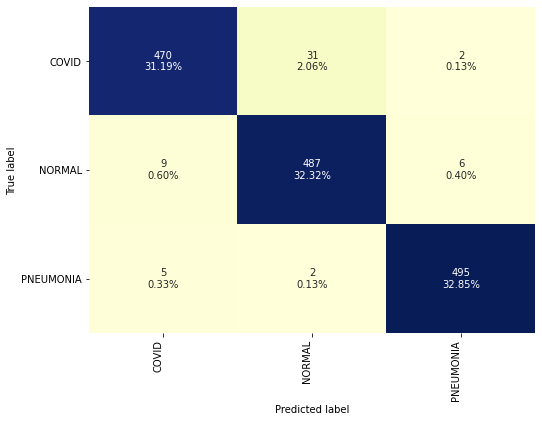

In [ ]:
make_confusion_matrix(cm_test, figsize=(8,6), cbar=False, categories=class_names, save_dir='cm.png', sum_stats=False)

ROC AUC score: 0.9726381156612813 



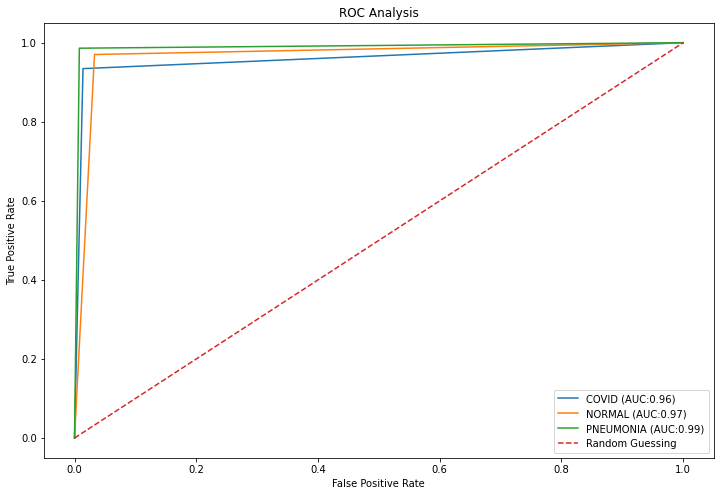

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(class_names):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, '--', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print(f'ROC AUC score: {multiclass_roc_auc_score(labels, predicted_classes)} \n')

c_ax.legend()
c_ax.set_title('ROC Analysis')
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.savefig('roc.png', dpi=300)
plt.show()


In [ ]:
print(f'metric name : [COVID, NORMAL, PNEUMONIA]')
FP = cm_test.sum(axis=0) - np.diag(cm_test) 
FN = cm_test.sum(axis=1) - np.diag(cm_test)
TP = np.diag(cm_test)
TN = cm_test.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
print(f'False Positives: {FP}')
print(f'False Negatives: {FN}')
print(f'True Positives: {TP}')
print(f'True Negatives: {TN}')

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(f'Sensitivity, hit rate, recall, or true positive rate : {TPR}')
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(f'Specificity or true negative rate : {TNR}')
# Precision or positive predictive value
PPV = TP/(TP+FP)
print(f'Precision or positive predictive value : {PPV}')
# Negative predictive value
NPV = TN/(TN+FN)
print(f'Negative predictive value : {NPV}')
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(f'Fall out or false positive rate : {FPR}')
# False negative rate
FNR = FN/(TP+FN)
print(f'False negative rate : {FNR}')
# False discovery rate
FDR = FP/(TP+FP)
print(f'False discovery rate : {FDR}')
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print(f'Overall accuracy for each class : {ACC}')

metric name : [COVID, NORMAL, PNEUMONIA]
False Positives: [14. 33.  8.]
False Negatives: [33. 15.  7.]
True Positives: [470. 487. 495.]
True Negatives: [990. 972. 997.]
Sensitivity, hit rate, recall, or true positive rate : [0.93439364 0.97011952 0.98605578]
Specificity or true negative rate : [0.98605578 0.96716418 0.9920398 ]
Precision or positive predictive value : [0.97107438 0.93653846 0.98409543]
Negative predictive value : [0.96774194 0.98480243 0.99302789]
Fall out or false positive rate : [0.01394422 0.03283582 0.0079602 ]
False negative rate : [0.06560636 0.02988048 0.01394422]
False discovery rate : [0.02892562 0.06346154 0.01590457]
Overall accuracy for each class : [0.96881221 0.96814864 0.99004645]


In [ ]:
sum(ACC)/3

0.9756690997566909